# Kecerdasan Buatan
*Komparasi klasifikasi penyakit cardio* <br>


**Ridho Nur Rohman Wijaya**

# Import Modul

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import SGD, Adam
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ambil Data

In [2]:
df_cardio = pd.read_csv("cardio_train.csv", sep=";")
df_cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Cek data kosong

In [3]:
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


## Frekuensi data target

In [4]:
df_cardio.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

# Preprocessing Data

## Bagi data fitur dan target

In [5]:
fitur = df_cardio.iloc[:,1:-1].values
target = df_cardio.iloc[:,-1].values

## Normalisasi data

In [6]:
scaler = MinMaxScaler()
fitur_scaler = scaler.fit_transform(fitur)

## Bagi data latih, validasi, dan prediksi

Data yang ada dibagi menjadi 3 yaitu:
1. 80% data latih
2. 16% data validasi
3. 4% data test

In [7]:
x_train, x_temp, y_train, y_temp = train_test_split(fitur_scaler, target, test_size=0.2, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.2, random_state=42)

# Metode Naive Bayes

## Buat model

In [8]:
model_nb = GaussianNB(priors=[0.4, 0.6], var_smoothing=1e-2)
model_nb.fit(x_train, y_train)

GaussianNB(priors=[0.4, 0.6], var_smoothing=0.01)

## Prediksi

In [9]:
y_valid_nb = model_nb.predict(x_valid)
print("Akurasi untuk data validasi adalah", round(accuracy_score(y_valid, y_valid_nb)*100,4),"%")

Akurasi untuk data validasi adalah 63.4018 %


# Metode Decission Tree

## Buat model

In [10]:
model_dt = DecisionTreeClassifier(ccp_alpha=1e-4, random_state=42)
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0001, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

## Prediksi

In [11]:
y_valid_dt = model_dt.predict(x_valid)
print("Akurasi untuk data validasi adalah", round(accuracy_score(y_valid, y_valid_dt)*100,4),"%")

Akurasi untuk data validasi adalah 73.5804 %


# Metode Multi Layer Perceptron

## Buat model

In [12]:
model_mlp = MLPClassifier(alpha=1e-6, max_iter=1000, hidden_layer_sizes=(100,3), n_iter_no_change=20, tol=1e-5)
model_mlp.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=1e-06, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 3), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=20, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=1e-05, validation_fraction=0.1, verbose=False,
              warm_start=False)

## Prediksi

In [13]:
y_valid_mlp = model_mlp.predict(x_valid)
print("Akurasi untuk data validasi adalah", round(accuracy_score(y_valid, y_valid_mlp)*100,4),"%")

Akurasi untuk data validasi adalah 72.625 %


# Metode Neural Networks Tensorflow

## Buat model

In [14]:
model_nn = Sequential([
                       Dense(32, activation="relu", input_shape=(x_train.shape[1],)),
                       Dropout(0.4),
                       Dense(32, activation="relu"),
                       Dropout(0.4),
                       Dense(16, activation="relu"),
                       Dropout(0.2),
                       Dense(2, activation="softmax")
])

model_nn.compile(optimizer=SGD(learning_rate=1e-3, momentum=0.9), 
                 loss="binary_crossentropy", metrics=["accuracy"])

In [15]:
hist_nn = model_nn.fit(x_train, pd.get_dummies(y_train).values,
                       validation_data=(x_valid, pd.get_dummies(y_valid).values),
                       epochs=50, verbose=2, batch_size=64)

Epoch 1/50
875/875 - 3s - loss: 0.6952 - accuracy: 0.5137 - val_loss: 0.6899 - val_accuracy: 0.5733
Epoch 2/50
875/875 - 2s - loss: 0.6910 - accuracy: 0.5345 - val_loss: 0.6869 - val_accuracy: 0.5855
Epoch 3/50
875/875 - 2s - loss: 0.6886 - accuracy: 0.5465 - val_loss: 0.6826 - val_accuracy: 0.5956
Epoch 4/50
875/875 - 2s - loss: 0.6859 - accuracy: 0.5572 - val_loss: 0.6779 - val_accuracy: 0.5981
Epoch 5/50
875/875 - 2s - loss: 0.6823 - accuracy: 0.5675 - val_loss: 0.6729 - val_accuracy: 0.5995
Epoch 6/50
875/875 - 2s - loss: 0.6787 - accuracy: 0.5762 - val_loss: 0.6687 - val_accuracy: 0.6028
Epoch 7/50
875/875 - 2s - loss: 0.6770 - accuracy: 0.5761 - val_loss: 0.6653 - val_accuracy: 0.6043
Epoch 8/50
875/875 - 2s - loss: 0.6740 - accuracy: 0.5840 - val_loss: 0.6626 - val_accuracy: 0.6033
Epoch 9/50
875/875 - 2s - loss: 0.6720 - accuracy: 0.5876 - val_loss: 0.6595 - val_accuracy: 0.6074
Epoch 10/50
875/875 - 2s - loss: 0.6692 - accuracy: 0.5933 - val_loss: 0.6573 - val_accuracy: 0.6109

## Visualisasi accuracy dan loss

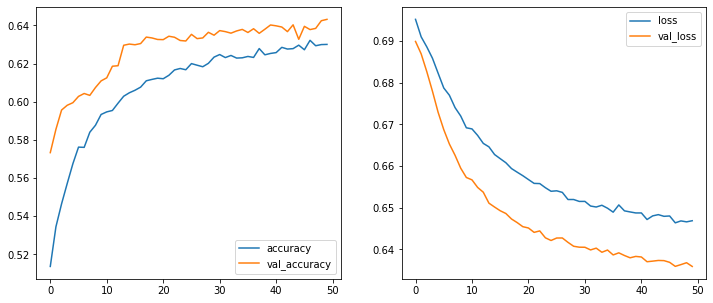

In [16]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
df_hist_nn = pd.DataFrame(hist_nn.history)
df_hist_nn[["accuracy","val_accuracy"]].plot.line(ax=ax[0])
df_hist_nn[["loss","val_loss"]].plot.line(ax=ax[1])
plt.show()

## Prediksi

In [17]:
y_valid_nn = model_nn.predict(x_valid).argmax(axis=1)
print("Akurasi untuk data validasi adalah", round(accuracy_score(y_valid, y_valid_nn)*100,4),"%")

Akurasi untuk data validasi adalah 64.3125 %


# Metode LSTM

## Buat model

In [18]:
model_lstm = Sequential([
                       LSTM(64, return_sequences=True, input_shape=(1,x_train.shape[1])),
                       LSTM(32, return_sequences=True),
                       LSTM(32),
                       Dense(32, activation="relu"),
                       Dropout(0.4),
                       Dense(16, activation="relu"),
                       Dropout(0.2),
                       Dense(2, activation="softmax")
])

model_lstm.compile(optimizer=Adam(learning_rate=1e-3), 
                 loss="binary_crossentropy", metrics=["accuracy"])

In [19]:
hist_lstm = model_lstm.fit(np.expand_dims(x_train, axis=1), pd.get_dummies(y_train),
                           validation_data=(np.expand_dims(x_valid, axis=1), pd.get_dummies(y_valid)),
                           epochs=50, verbose=2, batch_size=64)

Epoch 1/50
875/875 - 12s - loss: 0.6564 - accuracy: 0.6108 - val_loss: 0.6341 - val_accuracy: 0.6318
Epoch 2/50
875/875 - 6s - loss: 0.6386 - accuracy: 0.6403 - val_loss: 0.6281 - val_accuracy: 0.6471
Epoch 3/50
875/875 - 6s - loss: 0.6345 - accuracy: 0.6438 - val_loss: 0.6273 - val_accuracy: 0.6517
Epoch 4/50
875/875 - 5s - loss: 0.6326 - accuracy: 0.6455 - val_loss: 0.6260 - val_accuracy: 0.6460
Epoch 5/50
875/875 - 6s - loss: 0.6310 - accuracy: 0.6445 - val_loss: 0.6257 - val_accuracy: 0.6484
Epoch 6/50
875/875 - 6s - loss: 0.6300 - accuracy: 0.6490 - val_loss: 0.6204 - val_accuracy: 0.6535
Epoch 7/50
875/875 - 6s - loss: 0.6281 - accuracy: 0.6472 - val_loss: 0.6211 - val_accuracy: 0.6542
Epoch 8/50
875/875 - 6s - loss: 0.6269 - accuracy: 0.6498 - val_loss: 0.6201 - val_accuracy: 0.6576
Epoch 9/50
875/875 - 5s - loss: 0.6248 - accuracy: 0.6506 - val_loss: 0.6188 - val_accuracy: 0.6580
Epoch 10/50
875/875 - 6s - loss: 0.6242 - accuracy: 0.6515 - val_loss: 0.6164 - val_accuracy: 0.657

## Visualisasi accuracy dan loss

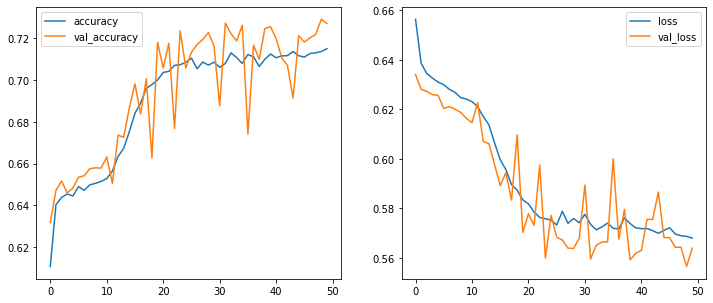

In [20]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
df_hist_lstm = pd.DataFrame(hist_lstm.history)
df_hist_lstm[["accuracy","val_accuracy"]].plot.line(ax=ax[0])
df_hist_lstm[["loss","val_loss"]].plot.line(ax=ax[1])
plt.show()

In [21]:
y_valid_lstm = model_lstm.predict(np.expand_dims(x_valid, axis=1)).argmax(axis=1)
print("Akurasi untuk data validasi adalah", round(accuracy_score(y_valid, y_valid_lstm)*100,4),"%")

Akurasi untuk data validasi adalah 72.7143 %


# Komparasi Hasil

## Perhitungan

In [22]:
y_test_nb = model_nb.predict(x_test)
y_test_dt = model_dt.predict(x_test)
y_test_mlp = model_mlp.predict(x_test)
y_test_nn = model_nn.predict(x_test).argmax(axis=1)
y_test_lstm = model_lstm.predict(np.expand_dims(x_test, axis=1)).argmax(axis=1)

# ------------------- Accuracy ------------------------

acc_nb = round(accuracy_score(y_test, y_test_nb)*100,4)
acc_dt = round(accuracy_score(y_test, y_test_dt)*100,4)
acc_mlp = round(accuracy_score(y_test, y_test_mlp)*100,4)
acc_nn = round(accuracy_score(y_test, y_test_nn)*100,4)
acc_lstm = round(accuracy_score(y_test, y_test_lstm)*100,4)

# ------------------- Precission ------------------------

precision_nb = round(precision_score(y_test, y_test_nb)*100,4)
precision_dt = round(precision_score(y_test, y_test_dt)*100,4)
precision_mlp = round(precision_score(y_test, y_test_mlp)*100,4)
precision_nn = round(precision_score(y_test, y_test_nn)*100,4)
precision_lstm = round(precision_score(y_test, y_test_lstm)*100,4)

# ------------------- Recall ------------------------

recall_nb = round(recall_score(y_test, y_test_nb)*100,4)
recall_dt = round(recall_score(y_test, y_test_dt)*100,4)
recall_mlp = round(recall_score(y_test, y_test_mlp)*100,4)
recall_nn = round(recall_score(y_test, y_test_nn)*100,4)
recall_lstm = round(recall_score(y_test, y_test_lstm)*100,4)

# ---------------------- F1 --------------------------

f1_nb = round(f1_score(y_test, y_test_nb)*100,4)
f1_dt = round(f1_score(y_test, y_test_dt)*100,4)
f1_mlp = round(f1_score(y_test, y_test_mlp)*100,4)
f1_nn = round(f1_score(y_test, y_test_nn)*100,4)
f1_lstm = round(f1_score(y_test, y_test_lstm)*100,4)

# ------------------- Gabungan ------------------------

model_name = ["Naive Bayes", "Decission Tree", "MLP", "Neural Networks", "LSTM"]
acc_pred = [acc_nb, acc_dt, acc_mlp, acc_nn, acc_lstm]
precision_pred = [precision_nb, precision_dt, precision_mlp, precision_nn, precision_lstm]
recall_pred = [recall_nb, recall_dt, recall_mlp, recall_nn, recall_lstm]
f1_pred = [f1_nb, f1_dt, f1_mlp, f1_nn, f1_lstm]

## Visualisasi

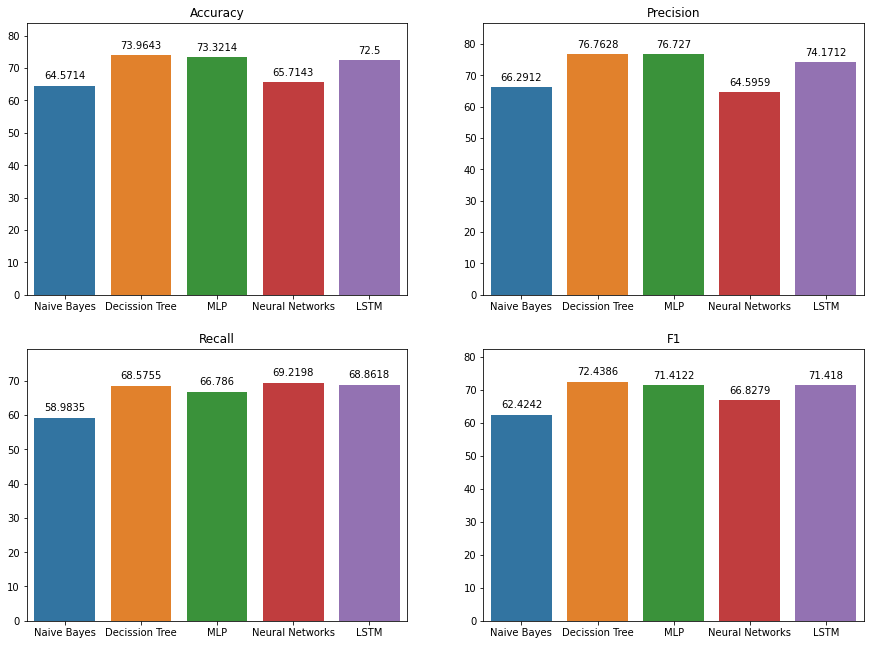

In [23]:
fig, ax = plt.subplots(2,2, figsize=(15,11))

# ------------------- Accuracy ------------------------

axes = sns.barplot(x=model_name, y=acc_pred, ax=ax[0,0])
for i in range(len(model_name)):
  axes.text(i, acc_pred[i]+3, acc_pred[i], 
           horizontalalignment='center', verticalalignment='center')
axes.set_ylim([0,max(acc_pred)+10])
axes.set_title("Accuracy")

# ------------------- Precission ------------------------

axes = sns.barplot(x=model_name, y=precision_pred, ax=ax[0,1])
for i in range(len(model_name)):
  axes.text(i, precision_pred[i]+3, precision_pred[i], 
           horizontalalignment='center', verticalalignment='center')
axes.set_ylim([0,max(precision_pred)+10])
axes.set_title("Precision")

# ------------------- Recall ------------------------

axes = sns.barplot(x=model_name, y=recall_pred, ax=ax[1,0])
for i in range(len(model_name)):
  axes.text(i, recall_pred[i]+3, recall_pred[i], 
           horizontalalignment='center', verticalalignment='center')
axes.set_ylim([0,max(recall_pred)+10])
axes.set_title("Recall")

# ---------------------- F1 --------------------------

axes = sns.barplot(x=model_name, y=f1_pred, ax=ax[1,1])
for i in range(len(model_name)):
  axes.text(i, f1_pred[i]+3, f1_pred[i], 
           horizontalalignment='center', verticalalignment='center')
axes.set_ylim([0,max(f1_pred)+10])
axes.set_title("F1")

plt.show()

## Hasil paling bagus

In [24]:
print("Accuracy tertinggi\t: ", model_name[np.array(acc_pred).argmax()], max(acc_pred), "%")
print("Precission tertinggi\t: ", model_name[np.array(precision_pred).argmax()], max(precision_pred), "%")
print("Recall tertinggi\t: ", model_name[np.array(recall_pred).argmax()], max(recall_pred), "%")
print("F1 tertinggi\t\t: ", model_name[np.array(f1_pred).argmax()], max(f1_pred), "%")

Accuracy tertinggi	:  Decission Tree 73.9643 %
Precission tertinggi	:  Decission Tree 76.7628 %
Recall tertinggi	:  Neural Networks 69.2198 %
F1 tertinggi		:  Decission Tree 72.4386 %


# Kesimpulan
Berdasarkan 4 jenis komparasi yang ada, dapat disimpulkan bahwa metode Decission Tree paling bagus untuk digunakan di datasets cardio ini.